# Programa para ocultar mensajes en imagenes y decodificarlas

Importamos las librerias necesarias (a cv2 no le vi necesidad)

In [102]:

"""
Created on Tue May 22 23:48:22 2018

@author: Cristian
"""

import numpy as np
#import cv2
from skimage.io import imread
from skimage.io import imsave
from matplotlib import pyplot as plt

Creamos una funcion para pasar numeros de base 10 a base 2 (binarios)

In [103]:
def binarizar(decimal):
    binario = ''
    while decimal // 2 != 0:
        binario = str(decimal % 2) + binario
        decimal = decimal // 2
    return str(decimal) + binario

Cargamos nuestra imagen y la mostramos

<function matplotlib.pyplot.show(*args, **kw)>

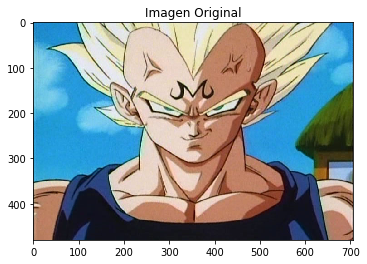

In [104]:
imagen_Original=imread('vegeta.jpg')
plt.title('Imagen Original')
plt.imshow(imagen_Original)
plt.show

Guardamos un mensaje de texto en una variable y creamos otra variable vacia

In [105]:
mensaje='Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano'
mensajeBinario=''
len(mensaje)

899

Convertimos el mensaje de texto guardado en bits y guardamos en otra variable

In [106]:
#convertir mensaje en binario y guardarlo en la variable mensajeBinario
for i in range(len(mensaje)):
    binario=binarizar(ord(mensaje[i]))
    while len(binario)<8:
        binario='0'+binario
    mensajeBinario=binario+mensajeBinario

Introducimos el mensaje convertido en binario entre los pixeles de la imagen original y guardamos la resultante en un archivo

In [107]:
imagen_Codificada=imagen_Original

contador=0
bandera=0

alto, ancho, canales = imagen_Original.shape

#codificar imagen original y guardarla en la variable imagen_Codificada
for ejeX in range(0,alto):
    if bandera==1:
        break
    for ejeY in range(0,ancho):                
        binario=binarizar(imagen_Original[ejeX,ejeY,0])
        while len(binario)<8:            
            binario='0'+binario         
        binario=binario[0:7]+mensajeBinario[contador]
        imagen_Codificada[ejeX,ejeY,0] = int(str(binario),2)
        contador=contador+1
        if contador ==len(mensajeBinario):
            bandera=1
            break

#crea el archivo con la imagen que contiene el mensaje codificado        
imsave('vegetaCodigo.bmp',imagen_Codificada)

Mostramos la imagen codificada, a simple vista no tiene cambios significativos notables entre esta y la original

<function matplotlib.pyplot.show(*args, **kw)>

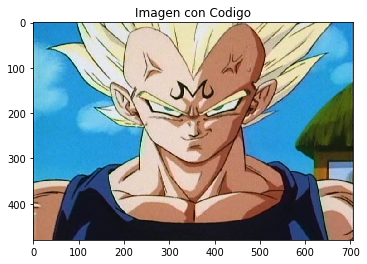

In [108]:
plt.title('Imagen con Codigo')
plt.imshow(imagen_Codificada)
plt.show



Mostramos imagen en pantalla de la diferencia entre la original y la codificada al parecer es muy minima porque no es notable a simple vista

<function matplotlib.pyplot.show(*args, **kw)>

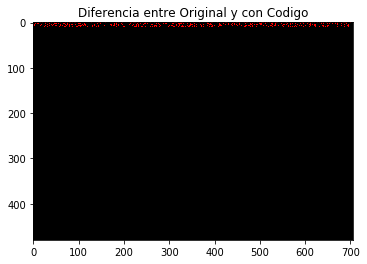

In [114]:
plt.title('Diferencia entre Original y con Codigo')

imagen_Original=imread('vegeta.jpg')
imagen_Codificada=imread('vegetaCodigo.bmp')

imagen_Diferencia=imagen_Original -  imagen_Codificada
plt.imshow(imagen_Diferencia)
plt.show

Decodificamos el mensaje oculto en la imagen codificada, extraemos los bits introducidos anteriormente

In [92]:
#Decodificacion de la imagen con el mensaje oculto
alto, ancho, canales = imagen_Codificada.shape
contador=0
bandera=0
mensajeBinarioEncontrado=''

for ejeX in range(0,alto):
    if bandera==1:
        break
    for ejeY in range(0,ancho):
        binario=binarizar(imagen_Codificada[ejeX,ejeY,0])
        while len(binario)<8:
            binario='0'+binario
        mensajeBinarioEncontrado=mensajeBinarioEncontrado+binario[7]
        contador=contador+1
        if contador==len(mensajeBinario):
            bandera=1
            break
        i=0

Se transforman los bits encontrados en caracteres del codigo ascii y se arma la cadena para por ultimo mostrarla en pantalla

In [93]:
resuesta=''

while i<len(mensajeBinarioEncontrado):
    part=mensajeBinarioEncontrado[i:i+8]
    resuesta=(chr(int(str(part), 2)))+resuesta
    i=i+8 
print('Codigo oculto encontrado',resuesta)

Codigo oculto encontrado Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano Cristian Bernardo Ruiz Verano
